In [1]:
%matplotlib inline
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import joypy

In [51]:
#Load data
# clusters looks like {cluster_id:[123,456,...]} where 123 and 456 are proj ids in that cluster
pickle_in = open("./results/motifs_by_cluster.pickle","rb")
motifs_by_cluster = pickle.load(pickle_in)

pickle_in = open("./results/clusters.pickle","rb")
clusters = pickle.load(pickle_in)

# Load Data
comm_auth_by_proj = pd.read_csv('data/author_commits_by_proj_100.csv').set_index('p_id')
pr_cr_by_proj = pd.read_csv('data/pr_cr_by_proj_100.csv').set_index('p_id')
issues_by_proj = pd.read_csv('data/issues_by_proj_100.csv').set_index('p_id')
owner_age_by_proj = pd.read_csv('data/owner_age_by_proj_100.csv').set_index('p_id')
time_betw_commits_by_proj = pd.read_csv('data/time_between_commits_100.csv').set_index('p_id')

project = pd.concat([comm_auth_by_proj,pr_cr_by_proj,issues_by_proj,owner_age_by_proj,time_betw_commits_by_proj],axis=1)
#project = pd.concat([comm_auth_by_proj,pr_cr_by_proj,issues_by_proj],axis=1)

In [52]:
cluster_lookup = {}
for cluster,value in clusters.items():
    for proj in value:
        cluster_lookup[proj] = cluster

project['cluster'] = project.reset_index().p_id.apply(lambda x: cluster_lookup[x]).values

## Summary Stats

In [53]:
project.groupby('cluster').median()

,commits,authors,prs,code_reviews,issues,owner_age,median_tbc,mean_tbc
cluster,,,,,,,,
0,169.0,4.0,0.0,0.0,0.0,359.0,0.0,0.900000
1,148.0,4.0,1.0,0.0,36.0,362.5,0.0,1.807339
2,169.0,2.0,0.0,0.0,1.0,584.5,0.0,1.764017
3,164.5,4.0,26.0,0.0,38.0,572.0,0.0,0.855019
4,172.0,3.0,0.0,0.0,0.0,382.0,0.0,1.439366
5,151.5,1.0,0.0,0.0,0.0,460.0,0.0,1.264171
6,167.0,3.0,1.0,0.0,9.0,682.0,0.0,1.687974
7,149.0,4.0,0.0,0.0,0.0,292.0,0.0,0.276037
8,194.5,5.0,1.0,0.0,34.0,489.5,0.0,2.165886


In [54]:
project.groupby('cluster').quantile(.9)

0.9,commits,authors,prs,code_reviews,issues,owner_age,median_tbc,mean_tbc
cluster,,,,,,,,
0,498.6,9.0,1.0,0.0,24.2,1264.0,0.0,4.720521
1,590.0,23.0,35.0,0.0,222.0,1401.0,1.0,8.309332
2,511.8,11.0,4.0,0.0,43.0,1737.2,0.0,6.828773
3,680.1,17.1,88.4,74.5,163.4,1667.4,0.0,4.360046
4,569.9,9.0,2.0,0.0,31.0,1278.4,0.0,6.611597
5,444.7,5.0,0.0,0.0,2.0,1507.3,1.0,7.411893
6,574.0,9.0,15.0,2.0,65.0,1619.2,0.0,6.944863
7,457.0,10.0,3.0,0.0,15.4,1125.8,0.0,1.916622
8,959.7,19.9,23.0,5.0,290.8,1482.0,0.0,8.960907


In [55]:
project.groupby('cluster').mean()

,commits,authors,prs,code_reviews,issues,owner_age,median_tbc,mean_tbc
cluster,,,,,,,,
0,271.543195,5.312426,0.765680,0.068639,9.210651,513.738869,0.081851,1.894263
1,353.118896,12.605096,11.738854,2.422505,95.205945,554.024887,0.168443,3.137441
2,321.860789,8.603248,2.109049,2.654292,22.674014,752.719715,0.099768,2.897505
3,601.780769,10.925000,45.725000,41.907692,119.344231,712.966270,0.021154,1.759390
4,281.644531,4.450521,1.110677,0.253906,12.529948,513.445910,0.116188,2.779536
5,681.075069,4.674242,7.296832,41.668044,10.753444,626.952381,0.406425,3.761782
6,319.346017,4.442331,6.800238,3.507729,27.234245,733.476074,0.072792,3.302935
7,318.186514,6.779053,2.332855,0.173601,7.692970,438.823872,0.027299,0.761490
8,452.421348,9.823034,10.362360,5.526685,122.355337,627.278274,0.088483,3.595139


## Author by Cluster

In [56]:
project.groupby('cluster').authors.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,845.0,5.312426,7.179117,1.0,2.0,4.0,6.0,82.0
1,471.0,12.605096,41.224929,1.0,2.0,4.0,9.5,700.0
2,862.0,8.603248,44.195116,1.0,1.0,2.0,4.0,947.0
3,520.0,10.925000,37.502218,1.0,2.0,4.0,9.0,662.0
4,768.0,4.450521,4.235585,1.0,2.0,3.0,5.0,36.0
5,1452.0,4.674242,21.683439,1.0,1.0,1.0,2.0,475.0
6,841.0,4.442331,9.083964,1.0,1.0,3.0,5.0,215.0
7,697.0,6.779053,15.992095,1.0,3.0,4.0,6.0,318.0
8,712.0,9.823034,19.516364,1.0,3.0,5.0,10.0,320.0


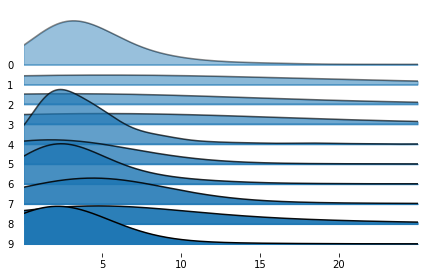

In [57]:
authors_pivot = project.pivot(columns='cluster', values='authors')
_=joypy.joyplot(authors_pivot,x_range=[0,25],fade=True)

## Commits by Cluster

In [58]:
project.groupby('cluster').commits.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,845.0,271.543195,361.058895,88.0,121.00,169.0,286.00,5966.0
1,471.0,353.118896,1068.930003,54.0,102.00,148.0,276.00,16937.0
2,862.0,321.860789,826.469281,90.0,126.00,169.0,291.75,19730.0
3,520.0,601.780769,2894.447074,70.0,114.00,164.5,311.00,44267.0
4,768.0,281.644531,331.704924,84.0,120.75,172.0,302.50,3425.0
5,1452.0,681.075069,5705.448440,99.0,118.00,151.5,239.00,126664.0
6,841.0,319.346017,991.640672,80.0,118.00,167.0,279.00,24983.0
7,697.0,318.186514,1600.077728,78.0,109.00,149.0,258.00,39988.0
8,712.0,452.421348,838.522210,75.0,123.00,194.5,419.25,11496.0


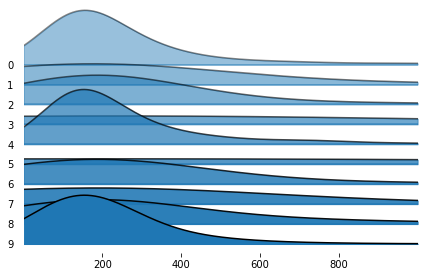

In [59]:
commits_pivot = project.pivot(columns='cluster', values='commits')
_=joypy.joyplot(commits_pivot,fade=True,x_range=[0,1000])

## Issues by Cluster

In [60]:
project.groupby('cluster').issues.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,845.0,9.210651,27.504556,0.0,0.0,0.0,4.00,266.0
1,471.0,95.205945,199.149281,0.0,2.0,36.0,89.50,1774.0
2,862.0,22.674014,160.957015,0.0,0.0,1.0,13.00,4470.0
3,520.0,119.344231,483.268575,0.0,18.0,38.0,75.25,8762.0
4,768.0,12.529948,46.831682,0.0,0.0,0.0,6.25,987.0
5,1452.0,10.753444,341.188982,0.0,0.0,0.0,0.00,12997.0
6,841.0,27.234245,62.442763,0.0,1.0,9.0,27.00,827.0
7,697.0,7.692970,36.851876,0.0,0.0,0.0,2.00,610.0
8,712.0,122.355337,348.842678,0.0,9.0,34.0,94.00,6817.0


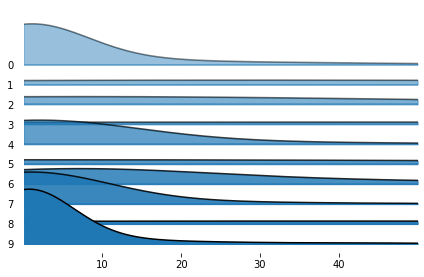

In [61]:
commits_pivot = project.pivot(columns='cluster', values='issues')
_=joypy.joyplot(commits_pivot,fade=True,x_range=[0,50])

## Pull Requests by Cluster

In [62]:
project.groupby('cluster').prs.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,845.0,0.765680,4.796771,0.0,0.0,0.0,0.0,122.0
1,471.0,11.738854,35.459743,0.0,0.0,1.0,9.5,565.0
2,862.0,2.109049,8.235764,0.0,0.0,0.0,1.0,117.0
3,520.0,45.725000,95.220641,0.0,10.0,26.0,48.0,1015.0
4,768.0,1.110677,4.549251,0.0,0.0,0.0,0.0,80.0
5,1452.0,7.296832,272.119297,0.0,0.0,0.0,0.0,10369.0
6,841.0,6.800238,16.589456,0.0,0.0,1.0,7.0,164.0
7,697.0,2.332855,11.747755,0.0,0.0,0.0,0.0,166.0
8,712.0,10.362360,32.534316,0.0,0.0,1.0,7.0,541.0


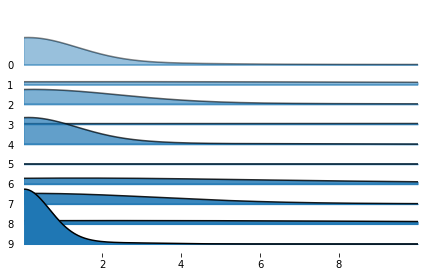

In [63]:
commits_pivot = project.pivot(columns='cluster', values='prs')
_=joypy.joyplot(commits_pivot,fade=True,x_range=[0,10])

## Code Reviews by Cluster

In [64]:
project.groupby('cluster').code_reviews.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,845.0,0.068639,0.859860,0.0,0.0,0.0,0.0,22.0
1,471.0,2.422505,17.680312,0.0,0.0,0.0,0.0,294.0
2,862.0,2.654292,28.970749,0.0,0.0,0.0,0.0,733.0
3,520.0,41.907692,175.147224,0.0,0.0,0.0,14.0,2518.0
4,768.0,0.253906,3.250411,0.0,0.0,0.0,0.0,68.0
5,1452.0,41.668044,1587.188066,0.0,0.0,0.0,0.0,60480.0
6,841.0,3.507729,21.898364,0.0,0.0,0.0,0.0,332.0
7,697.0,0.173601,2.529139,0.0,0.0,0.0,0.0,57.0
8,712.0,5.526685,28.797794,0.0,0.0,0.0,0.0,433.0


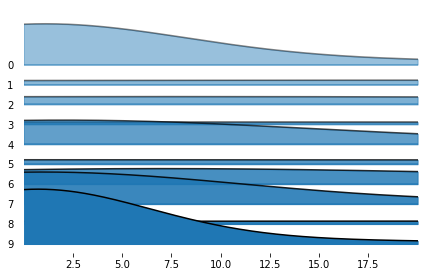

In [65]:
commits_pivot = project.pivot(columns='cluster', values='issues')
_=joypy.joyplot(commits_pivot,fade=True,x_range=[0,20])

## Owner Age

In [66]:
project.groupby('cluster').owner_age.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,831.0,513.738869,517.575288,0.0,76.50,359.0,813.50,2951.0
1,442.0,554.024887,572.956985,0.0,44.00,362.5,924.50,2550.0
2,842.0,752.719715,667.343649,0.0,180.25,584.5,1205.75,2909.0
3,504.0,712.966270,658.292865,0.0,136.75,572.0,1121.50,2951.0
4,758.0,513.445910,498.063239,0.0,85.50,382.0,794.50,2482.0
5,1428.0,626.952381,604.721109,0.0,81.75,460.0,1028.75,2713.0
6,815.0,733.476074,607.606996,0.0,206.00,682.0,1096.50,2651.0
7,687.0,438.823872,494.344726,0.0,42.00,292.0,678.50,2764.0
8,672.0,627.278274,593.013302,0.0,101.00,489.5,1012.00,2762.0


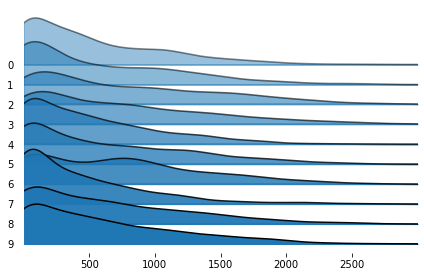

In [67]:
owner_age_pivot = project.pivot(columns='cluster', values='owner_age')
_=joypy.joyplot(owner_age_pivot,fade=True,x_range=[0,3000])

## Time Between Commits

In [70]:
project.groupby('cluster').mean_tbc.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,843.0,1.894263,2.819588,0.007937,0.360949,0.900000,2.290000,32.394737
1,469.0,3.137441,3.518614,0.000000,0.656051,1.807339,4.601770,21.417910
2,862.0,2.897505,3.536694,0.005102,0.722980,1.764017,3.851938,48.971429
3,520.0,1.759390,2.399784,0.000000,0.249002,0.855019,2.377935,13.992126
4,766.0,2.779536,4.670852,0.005747,0.535657,1.439366,3.201616,66.750000
5,1432.0,3.761782,10.320574,0.000000,0.385141,1.264171,3.501623,173.833333
6,838.0,3.302935,9.143193,0.000000,0.678952,1.687974,3.672912,228.166667
7,696.0,0.761490,1.531311,0.000000,0.107245,0.276037,0.645134,13.531746
8,712.0,3.595139,4.166514,0.000000,0.822261,2.165886,4.725531,35.411765


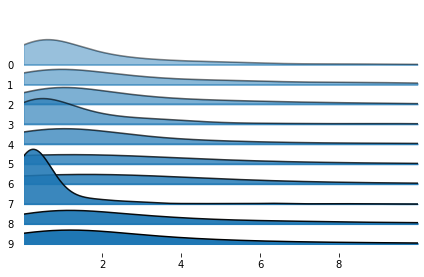

In [73]:
mean_tbc_pivot = project.pivot(columns='cluster', values='mean_tbc')
_=joypy.joyplot(mean_tbc_pivot,fade=True,x_range=[0,10])

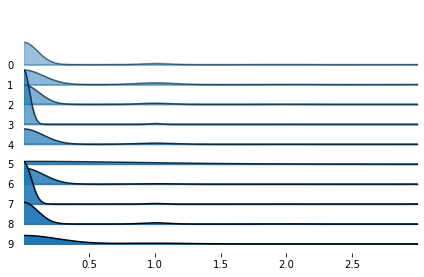

In [75]:
mean_tbc_pivot = project.pivot(columns='cluster', values='median_tbc')
_=joypy.joyplot(mean_tbc_pivot,fade=True,x_range=[0,3])